In [1]:
#all imports once at the begining

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from matplotlib.lines import Line2D


# The goal of this analysis is to determine if being a left handed batter makes it more likly for you to get onto the allstar team.

In [2]:
#Load in needed datasets

allstar = pd.read_csv('baseball/core/AllstarFull.csv')

batting = pd.read_csv('baseball/core/people.csv')


In [3]:
#Split batting up into left and right and remove unneeded data from csv files

batting = batting[['playerID', 'bats']]

left = batting[batting.bats == 'L']

right = batting[batting.bats == 'R']

both = batting[batting.bats == 'B']

allstar = allstar[['playerID']]

In [4]:
# getting % of left handded hitters vs right handed hitters

leftPercent = len(left)/(len(left)+len(right)+len(both))
rightPercent = len(right)/(len(left)+len(right)+len(both))
bothPercent = len(both)/(len(left)+len(right)+len(both))

# print("Players who hit left handed " + str(leftPercent) + "%")
# print("Players who hit right handed " + str(rightPercent) + "%")
# print("Players who hit with bothhands " + str(bothPercent) + "%")

In [5]:
lefts = 0
rights = 0
switch = 0


for id in allstar['playerID']:
    lefttest = left[left.playerID == id]
    righttest = right[right.playerID == id]
    switches = both[both.playerID == id]
    
    if not lefttest.empty:
        lefts += 1
        
    if not righttest.empty:
        rights += 1
        
    if not switches.empty:
        switch += 1
    
        
# print(lefts)
# print(rights)
# print(switch)

In [6]:
leftPercentAS = lefts/(lefts+rights+switch)
rightPercentAS = rights/(lefts+rights+switch)
switchPercentAS = switch/(lefts+rights+switch)

# print("Players who hit left handed " + str(leftPercentAS) + "%")
# print("Players who hit right handed " + str(rightPercentAS) + "%")
# print("Players who hit switch handed " + str(switchPercentAS) + "%")

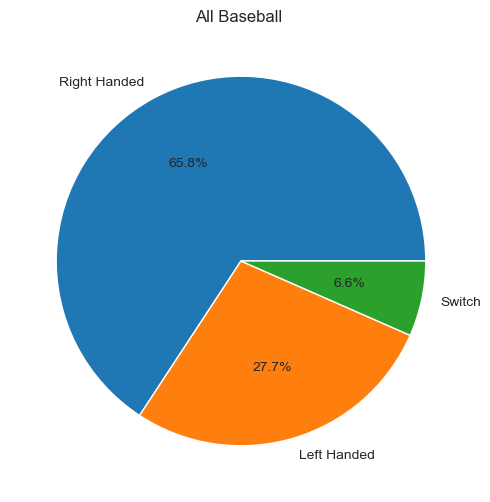

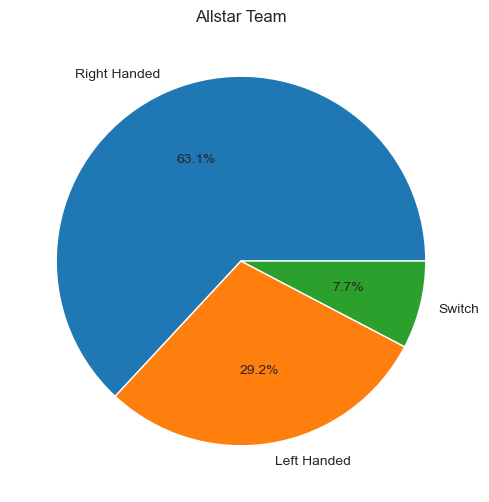

In [7]:
data = {'labels': ['Right Handed', 'Left Handed', 'Switch'],
        'values': [rightPercent, leftPercent, bothPercent]}
df = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%')
plt.title('All Baseball ')
plt.show()

data = {'labels': ['Right Handed', 'Left Handed', "Switch"],
        'values': [rightPercentAS, leftPercentAS, switchPercentAS]}
df = pd.DataFrame(data)

sns.set_style("whitegrid")
plt.figure(figsize=(6,6))
plt.pie(df['values'], labels=df['labels'], autopct='%1.1f%%')
plt.title('Allstar Team')
plt.show()

# Do hall of fame players make more money?

In [8]:
#loading datasets and removing bloatware

hall_Fame = pd.read_csv('baseball/core/HallOfFame.csv')

salaries = pd.read_csv('baseball/core/Salaries.csv')

salaries = salaries[['yearID', 'playerID', 'salary']]

hall_Fame = hall_Fame[['playerID']]

In [9]:
# DO NOT RUN THIS CODE BLOCK TWICE WITHOUT RUNNING THE CODE BLOCK ABOE IT FIRST

# gets the salaries and years of each player in the hall of fame and puts it into its own data frame

hf_years = []
hf_salaries = []



for hf_player in hall_Fame.playerID:
    if not salaries[salaries['playerID'] == hf_player].empty:
        
        # these lines get the salaries and years of all the hall of fame players
        for year in salaries[salaries['playerID'] == hf_player].yearID:
            hf_years.append(year)
        for sal in salaries[salaries['playerID'] == hf_player].salary:
            hf_salaries.append(sal)
            
        # this line removes hall of fame players from the salaries pool
        salaries = salaries.drop(salaries[salaries.playerID == hf_player].index)
            
        
            
            
# these lines make the years and salaries of hall of fame players into a 
hf_dict = {'yearID': hf_years, 'salaries': hf_salaries}

hf_year_sal = pd.DataFrame(hf_dict)
 

In [10]:
# take average salaries of both and graph them for each year on a line graph

        
startYear = 1985
endYear = 2012

x = startYear
hallFamePlayers = []
normalPlayers = []
y = 0
while y < 1985:
    hallFamePlayers.append(0)
    normalPlayers.append(0)
    y+=1

while x <= endYear:
    i = 0
    j = 0
    for item in salaries[salaries['yearID'] == x].salary:
        i+=1
        j+=item
        
    normalPlayers.append(j / i)
    x+=1
    
    
x = startYear

while x <= endYear:
    i = 0
    j = 0
    for item in hf_year_sal[hf_year_sal['yearID'] == x].salaries:
        i+=1
        j+=item
        
    hallFamePlayers.append(j / i)
    x+=1




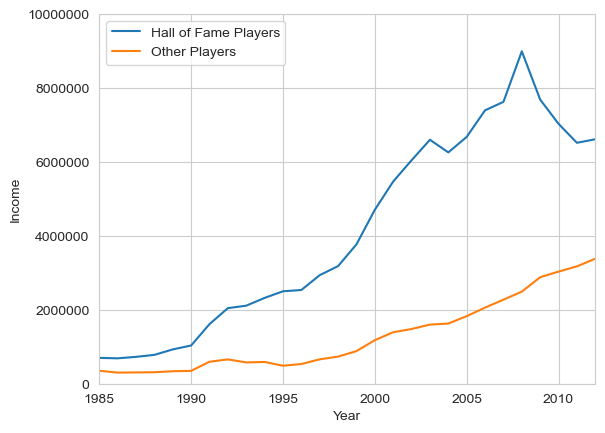

In [11]:
plt.plot(hallFamePlayers)
plt.plot(normalPlayers)
plt.xlim(1985, 2012)
plt.ylim(0, 10000000)
plt.ticklabel_format(scilimits=(-5, 8))
plt.ylabel('Income')
plt.xlabel('Year')

plt.legend(["Hall of Fame Players", "Other Players"])


plt.show()